<a href="https://colab.research.google.com/github/DesaiBhakti/Time-Series-Analysis/blob/main/ASI_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
#connecting google drive to the colab for data importing
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/ASI data.csv')

In [ ]:
#top 5 rows of the dataset
df.head(5)

,Year,GVA Growth rate
0,2008-09,10.593324
1,2009-10,14.047030
2,2010-11,18.352547
3,2011-12,9.704564
4,2012-13,11.275912


In [ ]:
#setting column 'Year' as index of the dataframe
df1 = df.set_index('Year')
df1

,GVA Growth rate
Year,
2008-09,10.593324
2009-10,14.047030
2010-11,18.352547
2011-12,9.704564
2012-13,11.275912
2013-14,5.741419
2014-15,9.350273
2015-16,9.322311
2016-17,7.443047


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

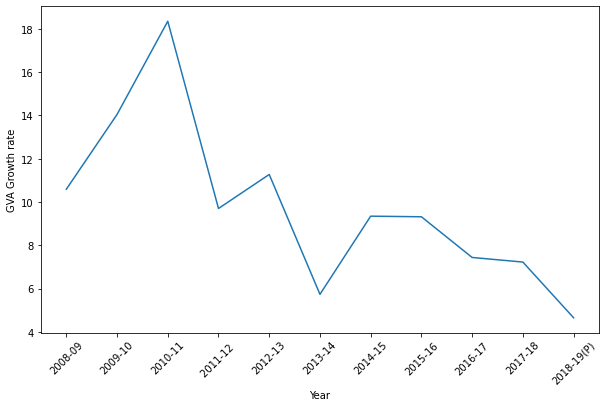

In [ ]:
#plot graph
plt.xlabel('Year')
plt.ylabel('GVA Growth rate')
plt.plot(df1)
plt.xticks(rotation=45)

In [ ]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
dftest = adfuller(df1['GVA Growth rate'],autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistics','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistics               -0.853943
p-value                        0.802761
#Lags Used                     1.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


In [ ]:
#Differencing
df = df1.diff()

In [ ]:
#replacing the null value by its next value
df = df.fillna(method='bfill')

In [ ]:
#counting number of missing values
df.isna().sum()

GVA Growth rate    0
dtype: int64

In [ ]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
dftest = adfuller(df['GVA Growth rate'],autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistics','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistics               -6.457337e+00
p-value                        1.472259e-08
#Lags Used                     3.000000e+00
Number of Observations Used    7.000000e+00
Critical Value (1%)           -4.938690e+00
Critical Value (5%)           -3.477583e+00
Critical Value (10%)          -2.843868e+00
dtype: float64
